# 📏 #30DayMapChallenge - Day 2: Lines

**Second map of the [#30DayMapChallenge](https://30daymapchallenge.com/) 2024, created for Náttúrufræðistofnun.**


## Visualizing the Road Network of the Reykjavík Capital Area, Iceland

----

### Overview
This project explores **road network visualization** for the Reykjavík capital area in Iceland, drawing inspiration from Milan Janosov's ["Visualizing Road Networks"](https://towardsdatascience.com/visualizing-road-networks-c4664182e6c1) article on *Towards Data Science*. The focus is on crafting a **minimalist yet informative representation** of the urban road layout and connectivity. 

The workflow demonstrates:
- **Extracting and analyzing** road network data from **OpenStreetMap** using the `osmnx` Python package.
- **Processing geometries** with `GeoPandas` to clean and stylize road segments.
- **Creating visualizations** with `matplotlib`, emphasizing clarity and aesthetics.

This notebook is designed for beginners and experts alike, showing a **simple yet powerful approach** to map-making in Python while looking at Reykjavík’s urban structure.


### How to Use
1. Clone the repository or download this notebook.
2. Install required libraries: `osmnx`, `geopandas`, `matplotlib`, `shapely`, and `requests`.
3. Run the code to generate the road network visualization.
4. Experiment with styles or apply the workflow to your own region.




| Run the code via free cloud platforms: | [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/lmi/30DayMapChallenge/master?filepath=/Day-2/Day2-Lines.ipynb) | [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/lmi/30DayMapChallenge/blob/master/Day-2/Day2-Lines.ipynb) | [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lmi/30DayMapChallenge/blob/master/Day-2/Day2-Lines.ipynb) |
|---|---|---|---|




### Attribution
- **License**: This notebook is published under **CC BY 4.0**.
- **Citation**: "*Credits: Náttúrufræðistofnun*"
- **Author**: Michaela Hrabalíková


**Explore Reykjavík’s roads through data-driven storytelling!**

----

## Library Imports and Setup

First, let´s make sure we have all necessary libraries.

In [ ]:
# If you are using Google Colab, uncomment the following lines to install packages
# !pip install osmnx geopandas matplotlib shapely requests


In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

import requests
from shapely.geometry import Polygon


## Define the Target City for Visualization

We will focus on Reykjavík area, but you can easily change the code to another city. 
What is osmnx.........

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-22.13094 63.83634, -22.12977 ...",-22.130945,63.829379,-21.162838,64.380794,251269732,relation,3881596,64.172714,-21.566758,boundary,administrative,10,0.477399,state_district,Capital Region,"Capital Region, Iceland"


<Axes: >

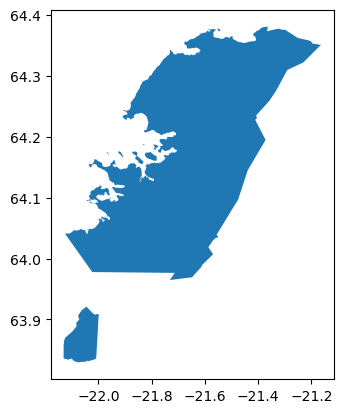

In [2]:
# Define city name
city  = 'Capital Region, Iceland'

# download and plot the admin boundaries of the target area
admin = ox.geocode_to_gdf(city)
display(admin)
admin.plot()

## Download and Visualize the Road Network

* Download the network for the chosen city and calculate intersections and road segments.
* Turn the graph into GeoDataFrames (nodes and edges).
* Include additional comments explaining each step.


In [3]:
# Download the road network within the admin boundary
#G = ox.graph_from_polygon(admin.geometry.to_list()[0])
G = ox.graph_from_polygon(admin.geometry.iloc[0], network_type='drive')

# Print the number of intersections (nodes) and road segments (edges)
print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments: ', G.number_of_edges())

# # Convert the graph to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

Number of intersections:  11092
Number of road segments:  22566


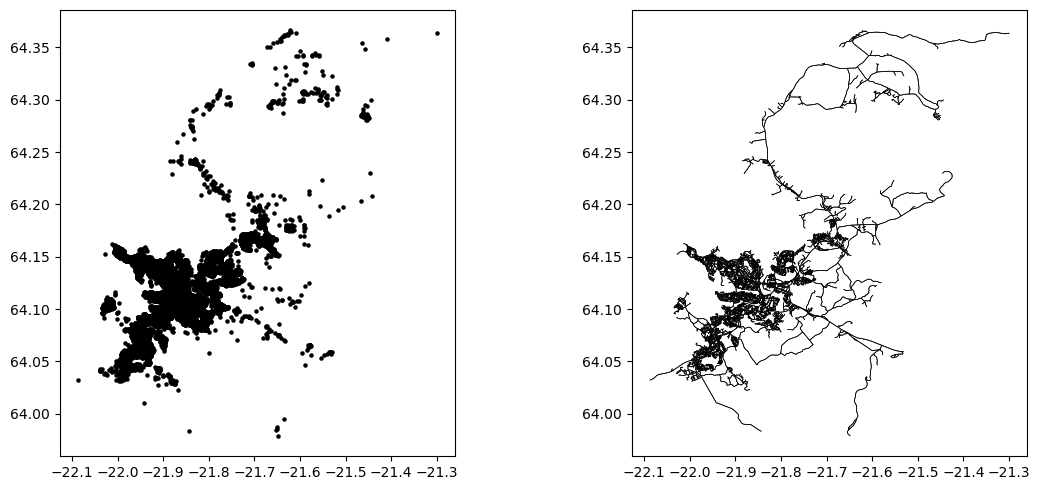

In [4]:
# plotting the two GeoDataFrames extracted from the road network graph
fig, ax = plt.subplots(1, 2, figsize = (12,5))

nodes.plot(ax = ax[0], color = 'black', markersize = 5)
edges.plot(ax = ax[1], color = 'black', linewidth = 0.5)

plt.tight_layout()

Text(0.5, 0.9, 'Road network in Capital Region, Iceland')

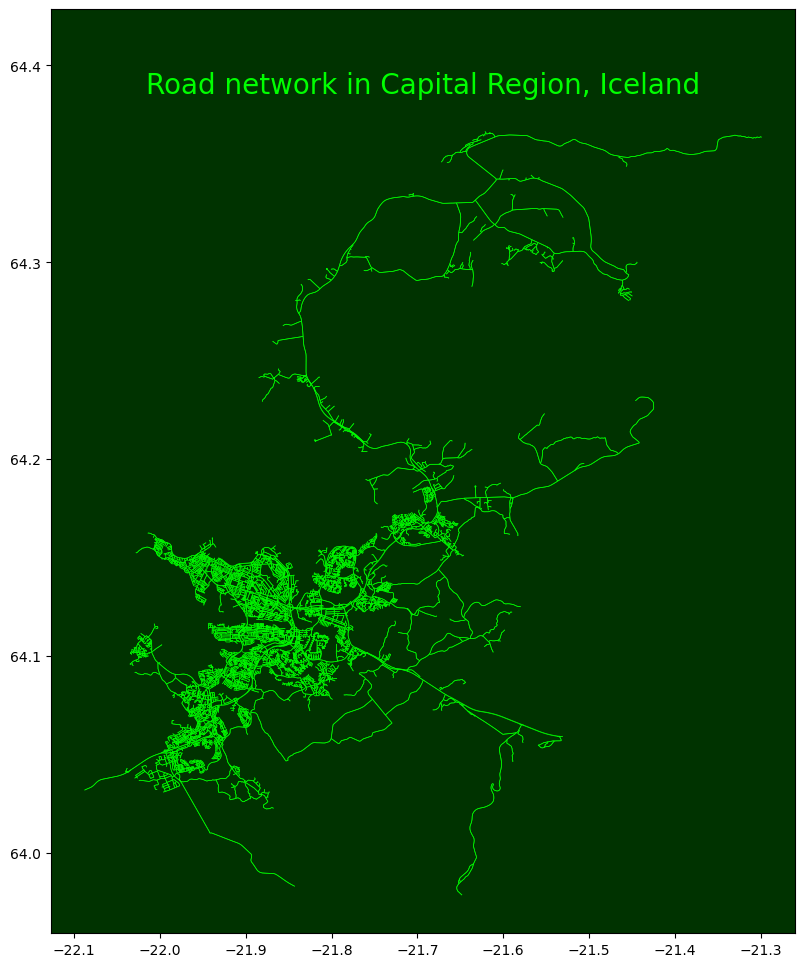

In [10]:
# set the plot parameters, adjust color and style as desired
# define the colors
color_palette = [{"color_line": "#00ff00",  "background": "#003300"}]

# Define the index
idx = 0

color_line = color_palette[idx]['color_line']
color_bcg  = color_palette[idx]['background'] # Set a background color for contrast
width = 0.5

# Plot the road network edges
fig, ax = plt.subplots(figsize=(12, 12))
edges.plot(ax=ax, 
           color=color_line, 
           linewidth=width, 
           alpha=0.9
           )  
ax.set_facecolor(color_bcg)  

# get rid of the ticks
#ax.set_xticks([])
#ax.set_yticks([])

# set the title
title = "Road network in " + city # Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize = 20, color = color_line, y = 0.9)



## Let's zoom to a specific area

The bounding box is define by North, South, East, West: 
* North: Maximum latitude of the box (upper boundary).
* South: Minimum latitude of the box (lower boundary).
* East: Maximum longitude of the box (right boundary).
* West: Minimum longitude of the box (left boundary).

Example

      (-21.9300, 64.1500)                (-21.9100, 64.1500)
              * --------------------------- *
              |                             |
              |                             |
              |                             |
              |                             |
              * --------------------------- *
      (-21.9300, 64.1400)                (-21.9100, 64.1400)


coordinate Breakdown:
1. **(-21.9300, 64.1400)**: Bottom-left corner
2. **(-21.9100, 64.1400)**: Bottom-right corner
3. **(-21.9100, 64.1500)**: Top-right corner
4. **(-21.9300, 64.1500)**: Top-left corner

polygon_coords = [(-21.9300, 64.1400), (-21.9100, 64.1400), (-21.9100, 64.1500), (-21.9300, 64.1500)]

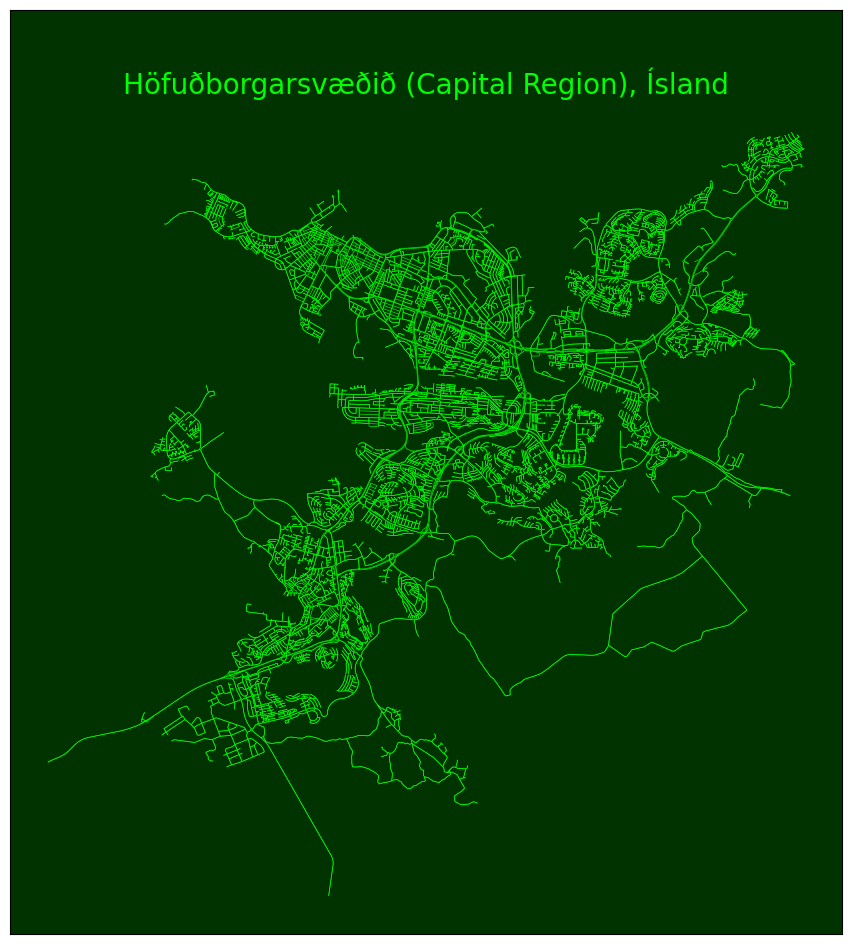

In [12]:
# Define coordinates for a custom polygon within Reykjavík
polygon_coords = [(-22.1, 64.0), (-21.7, 64.0), (-21.7, 64.2), (-22.1, 64.2)]
polygon = Polygon(polygon_coords)

# Download the road network within the custom polygon and convert the graph to GeoDataFrames for nodes and edges
G = ox.graph_from_polygon(polygon, network_type='drive')
nodes, edges = ox.graph_to_gdfs(G)


# set the plot parameters, adjust color and style as desired
title = 'Höfuðborgarsvæðið (Capital Region), Ísland' # Set the title
# define the colors
color_palette = [{"color_line": "#00ff00",  "background": "#003300"}]

# Define the index
idx = 0

color_line = color_palette[idx]['color_line']
color_bcg  = color_palette[idx]['background'] 
width = 0.5

# Plot the road network edges
fig, ax = plt.subplots(figsize=(12, 12))
edges.plot(ax=ax, 
           color=color_line, 
           linewidth=0.5, 
           alpha=0.9
           )  
ax.set_facecolor(color_bcg)  

# get rid of the ticks
ax.set_xticks([])
ax.set_yticks([])

# set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize = 20, color = color_line, y = 0.9)




plt.show()

## Import the road network of Iceland
The road network of Iceland from IS_50V can be found here: https://gatt.natt.is/geonetwork/srv/ice/catalog.search#/metadata/41D3314D-55AF-4FE3-9A9F-B9CB18AC5CAA

In [13]:
# URL of the GeoPackage
url = "https://gis.natt.is/geoserver/IS_50V/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=IS_50V%3Asamgongur_linur&maxFeatures=100000&outputFormat=application%2Fx-gpkg"

# Download the GeoPackage
response = requests.get(url)
with open("iceland_roads.gpkg", "wb") as f:
    f.write(response.content)



c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'iceland_roads.gpkg'
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'INT4' not supported. Interpreted as INT
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'UUID' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: geometry column 'uuid' of type 'UUID' ignored
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'VARCHAR(255)' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-p

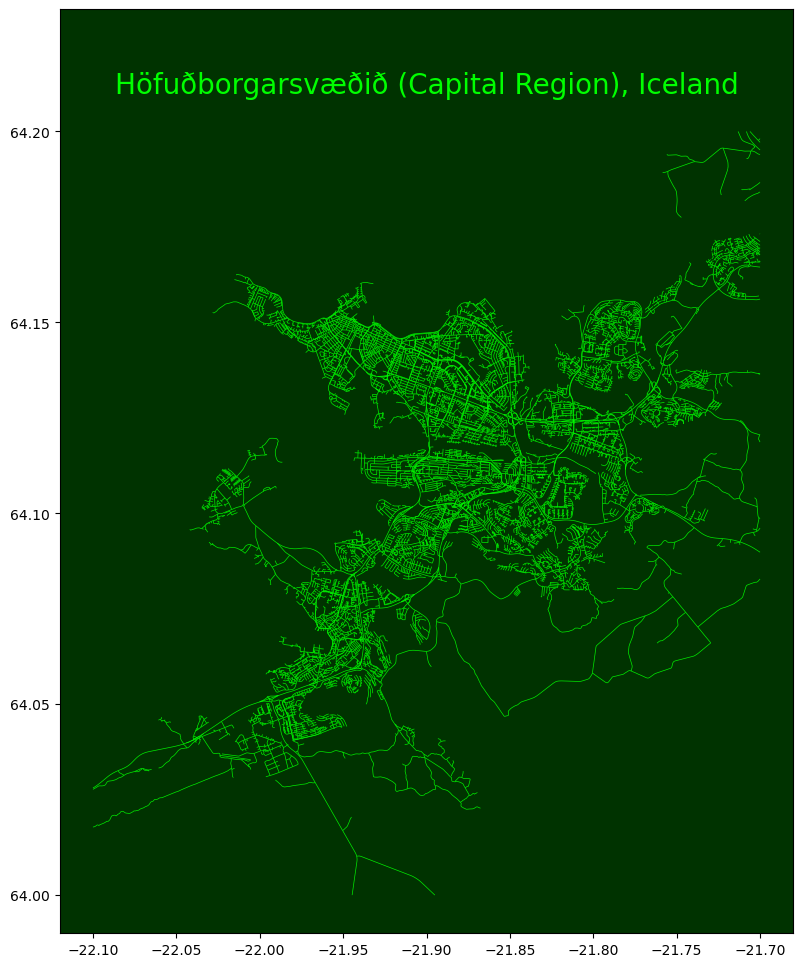

In [ ]:
# Load the GeoPackage containing roads
gdf_roads_full = gpd.read_file("iceland_roads.gpkg")

# Define coordinates for the bounding box (polygon) in Reykjavík
polygon_coords = [(-22.1, 64.0), (-21.7, 64.0), (-21.7, 64.2), (-22.1, 64.2)]
bounding_box = Polygon(polygon_coords)


# Create a GeoDataFrame for the bounding box, ensuring the CRS matches
gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs=gdf_roads_full.crs)

# Create a GeoDataFrame for the bounding box
#gdf_bbox = gpd.GeoDataFrame([1], geometry=[bounding_box], crs=gdf_roads_full.crs)

# Clip the road data to the bounding box
gdf_roads_clipped = gpd.clip(gdf_roads_full, gdf_bbox)

# Set plot parameters, colors, and styles
title = 'Höfuðborgarsvæðið (Capital Region), Iceland' # Set the title
color_line = "#00ff00"  # Neon green for roads
color_bcg = "#003300"   # Dark green background
width = 0.5

# Plot the clipped road network
fig, ax = plt.subplots(figsize=(12, 12))
gdf_roads_clipped.plot(ax=ax, color=color_line, linewidth=width, alpha=0.9)

# Set the background color
ax.set_facecolor(color_bcg)

# Remove axis ticks and labels for a clean look
#ax.set_xticks([])
#ax.set_yticks([])

# Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize=20, color=color_line, y=0.9)

# Display the plot
plt.show()

c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'iceland_roads.gpkg'
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'INT4' not supported. Interpreted as INT
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'UUID' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: geometry column 'uuid' of type 'UUID' ignored
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'VARCHAR(255)' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-p

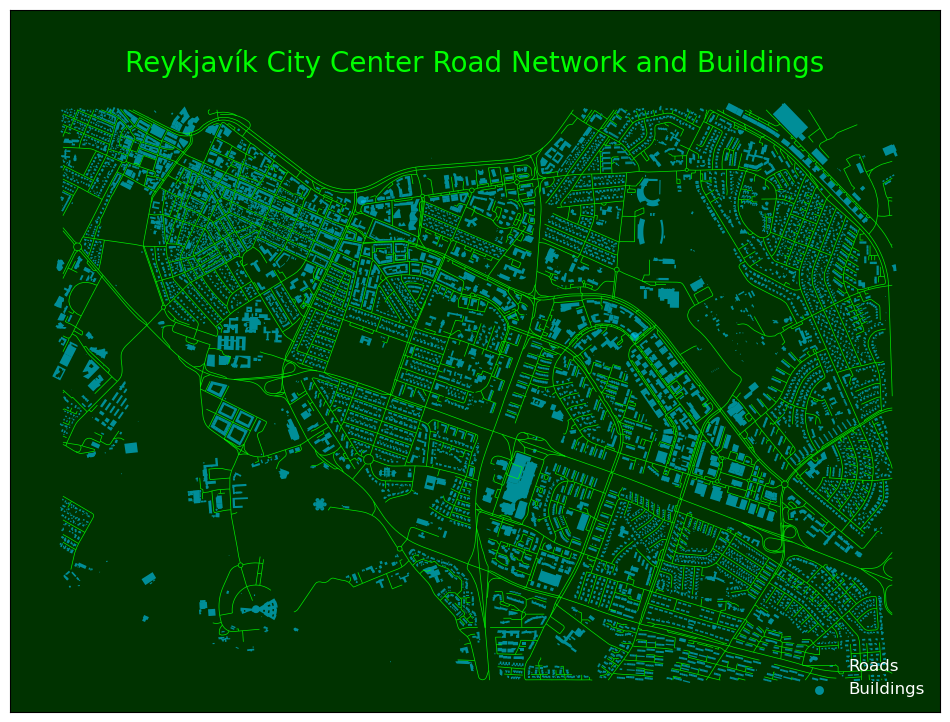

In [20]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the GeoPackage containing roads
gdf_roads_full = gpd.read_file("iceland_roads.gpkg")

# Define a smaller bounding box for Reykjavík city center
# Adjust the coordinates to zoom further into the desired area
polygon_coords = [(-21.95, 64.12), (-21.85, 64.12), (-21.85, 64.15), (-21.95, 64.15)]
bounding_box = Polygon(polygon_coords)

# Create a GeoDataFrame for the bounding box, ensuring the CRS matches
gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs=gdf_roads_full.crs)

# Clip the road data to the bounding box
gdf_roads_clipped = gpd.clip(gdf_roads_full, gdf_bbox)

# Download building footprints within the bounding box using OSMnx
# Using tags for buildings
buildings = ox.features_from_polygon(bounding_box, tags={'building': True})

# Set plot parameters, colors, and styles
title = 'Reykjavík City Center Road Network and Buildings' # Set the title
color_line = "#00ff00"  # Neon green for roads
color_building = "#00ccff"  # Neon blue for buildings
color_bcg = "#003300"   # Dark green background

# Plot the clipped road network and buildings
fig, ax = plt.subplots(figsize=(12, 12))

# Plot roads
gdf_roads_clipped.plot(ax=ax, color=color_line, linewidth=0.5, alpha=0.9, label="Roads")

# Plot buildings
buildings.plot(ax=ax, color=color_building, linewidth=0.3, alpha=0.6, label="Buildings")

# Set the background color
ax.set_facecolor(color_bcg)

# Remove axis ticks and labels for a clean look
ax.set_xticks([])
ax.set_yticks([])

# Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize=20, color=color_line, y=0.9)

# Add a legend
plt.legend(loc="lower right", frameon=False, fontsize=12, labelcolor="white")

# Display the plot
plt.show()


c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'iceland_roads.gpkg'
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'INT4' not supported. Interpreted as INT
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'UUID' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: geometry column 'uuid' of type 'UUID' ignored
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'VARCHAR(255)' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-p

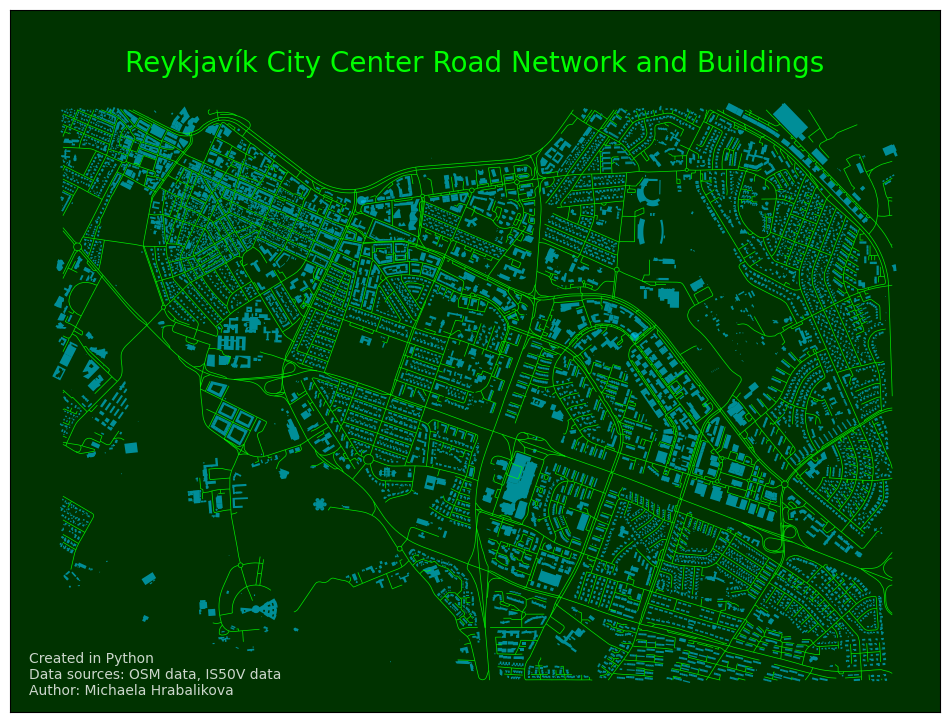

In [21]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the GeoPackage containing roads
gdf_roads_full = gpd.read_file("iceland_roads.gpkg")

# Define a smaller bounding box for Reykjavík city center
# Adjust the coordinates to zoom further into the desired area
polygon_coords = [(-21.95, 64.12), (-21.85, 64.12), (-21.85, 64.15), (-21.95, 64.15)]
bounding_box = Polygon(polygon_coords)

# Create a GeoDataFrame for the bounding box, ensuring the CRS matches
gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs=gdf_roads_full.crs)

# Clip the road data to the bounding box
gdf_roads_clipped = gpd.clip(gdf_roads_full, gdf_bbox)

# Download building footprints within the bounding box using OSMnx
# Using tags for buildings
buildings = ox.features_from_polygon(bounding_box, tags={'building': True})

# Set plot parameters, colors, and styles
title = 'Reykjavík City Center Road Network and Buildings' # Set the title
color_line = "#00ff00"  # Neon green for roads
color_building = "#00ccff"  # Neon blue for buildings
color_bcg = "#003300"   # Dark green background

# Plot the clipped road network and buildings
fig, ax = plt.subplots(figsize=(12, 12))

# Plot roads
gdf_roads_clipped.plot(ax=ax, color=color_line, linewidth=0.5, alpha=0.9, label="Roads")

# Plot buildings
buildings.plot(ax=ax, color=color_building, linewidth=0.3, alpha=0.6, label="Buildings")

# Set the background color
ax.set_facecolor(color_bcg)

# Remove axis ticks and labels for a clean look
ax.set_xticks([])
ax.set_yticks([])

# Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize=20, color=color_line, y=0.9)

# Add a legend
#plt.legend(loc="lower right", frameon=False, fontsize=12, labelcolor="white")

# Add custom text annotation in the lower left corner
ax.text(
    0.02, 0.02,  # Position (x, y) in relative coordinates
    'Created in Python\nData sources: OSM data, IS50V data\nAuthor: Michaela Hrabalikova', 
    transform=ax.transAxes,
    fontsize=10, 
    color="white", 
    ha='left', 
    va='bottom',
    alpha=0.8
)

# Display the plot
plt.show()


c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'iceland_roads.gpkg'
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'INT4' not supported. Interpreted as INT
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'UUID' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: geometry column 'uuid' of type 'UUID' ignored
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'VARCHAR(255)' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-p

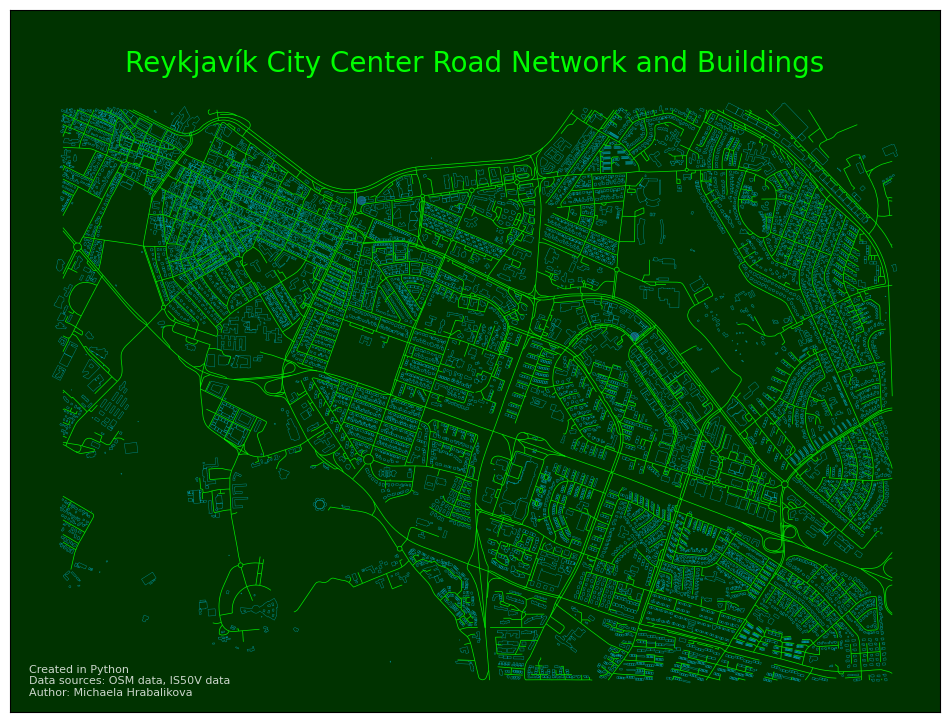

In [24]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the GeoPackage containing roads
gdf_roads_full = gpd.read_file("iceland_roads.gpkg")

# Define a smaller bounding box for Reykjavík city center
# Adjust the coordinates to zoom further into the desired area
polygon_coords = [(-21.95, 64.12), (-21.85, 64.12), (-21.85, 64.15), (-21.95, 64.15)]
bounding_box = Polygon(polygon_coords)

# Create a GeoDataFrame for the bounding box, ensuring the CRS matches
gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs=gdf_roads_full.crs)

# Clip the road data to the bounding box
gdf_roads_clipped = gpd.clip(gdf_roads_full, gdf_bbox)

# Download building footprints within the bounding box using OSMnx
# Using tags for buildings
buildings = ox.features_from_polygon(bounding_box, tags={'building': True}) # for OSMnx below 2.0.0 use geometries_from_polygon

# Set plot parameters, colors, and styles
title = 'Reykjavík City Center Road Network and Buildings'
color_line = "#00ff00"  # Neon green for roads
color_building = "#00ccff"  # Neon blue for building outlines
color_bcg = "#003300"   # Dark green background

# Plot the clipped road network and buildings
fig, ax = plt.subplots(figsize=(12, 12))

# Plot roads
gdf_roads_clipped.plot(ax=ax, color=color_line, linewidth=0.5, alpha=0.9, label="Roads")

# Plot buildings as outlines
buildings.plot(ax=ax, edgecolor=color_building, facecolor="none", linewidth=0.3, alpha=0.6, label="Buildings")

# Set the background color
ax.set_facecolor(color_bcg)

# Remove axis ticks and labels for a clean look
ax.set_xticks([])
ax.set_yticks([])

# Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize=20, color=color_line, y=0.9)

# Add custom text annotation in the lower left corner
ax.text(
    0.02, 0.02,  # Position (x, y) in relative coordinates
    'Created in Python\nData sources: OSM data, IS50V data\nAuthor: Michaela Hrabalikova', 
    transform=ax.transAxes,
    fontsize=8, 
    color="white", 
    ha='left', 
    va='bottom',
    alpha=0.8
)

# Save the plot as a PNG file with high resolution
output_path = "reykjavik_road_network.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor=color_bcg)

# Display the plot
plt.show()


c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: GPKG: unrecognized user_version=0x00000000 (0) on 'iceland_roads.gpkg'
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'INT4' not supported. Interpreted as INT
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'UUID' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: geometry column 'uuid' of type 'UUID' ignored
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'VARCHAR(255)' not supported
  return ogr_read(
c:\Users\michaela.hrabalikova\AppData\Local\miniconda3\envs\ox\Lib\site-p

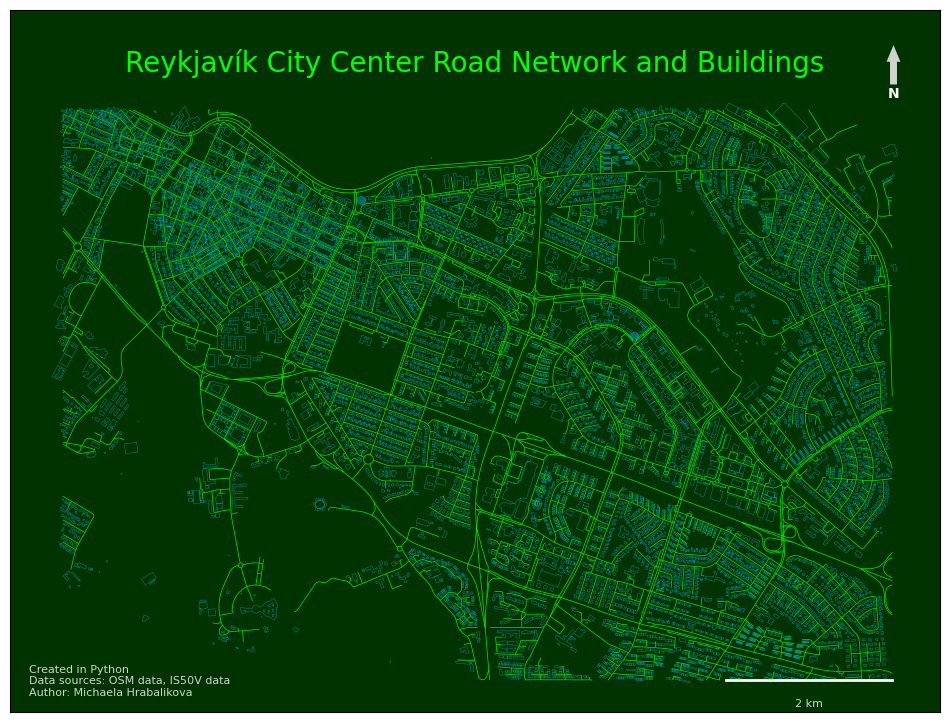

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import matplotlib.lines as mlines

# Load the GeoPackage containing roads
gdf_roads_full = gpd.read_file("iceland_roads.gpkg")

# Define a smaller bounding box for Reykjavík city center
polygon_coords = [(-21.95, 64.12), (-21.85, 64.12), (-21.85, 64.15), (-21.95, 64.15)]
bounding_box = Polygon(polygon_coords)

# Create a GeoDataFrame for the bounding box, ensuring the CRS matches
gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs=gdf_roads_full.crs)

# Clip the road data to the bounding box
gdf_roads_clipped = gpd.clip(gdf_roads_full, gdf_bbox)

# Download building footprints within the bounding box using OSMnx
buildings = ox.features_from_polygon(bounding_box, tags={'building': True})

# Set plot parameters, colors, and styles
title = 'Reykjavík City Center Road Network and Buildings'
color_line = "#00ff00"  # Neon green for roads
color_building = "#00ccff"  # Neon blue for building outlines
color_bcg = "#003300"   # Dark green background
annotation_color = "white"  # Color for text, north arrow, and scale bar

# Plot the clipped road network and buildings
fig, ax = plt.subplots(figsize=(12, 12))

# Plot roads
gdf_roads_clipped.plot(ax=ax, color=color_line, linewidth=0.5, alpha=0.9, label="Roads")

# Plot buildings as outlines
buildings.plot(ax=ax, edgecolor=color_building, facecolor="none", linewidth=0.3, alpha=0.6, label="Buildings")

# Set the background color
ax.set_facecolor(color_bcg)

# Remove axis ticks and labels for a clean look
ax.set_xticks([])
ax.set_yticks([])

# Set the title
ymin, ymax = plt.ylim()
extension = 0.1 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(title, fontsize=20, color=color_line, y=0.9)

# Add custom text annotation in the lower left corner
ax.text(
    0.02, 0.02,  # Position (x, y) in relative coordinates
    'Created in Python\nData sources: OSM data, IS50V data\nAuthor: Michaela Hrabalikova', 
    transform=ax.transAxes,
    fontsize=8, 
    color=annotation_color, 
    ha='left', 
    va='bottom',
    alpha=0.8
)

# Add a north arrow in the upper-right corner
ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.88),
            arrowprops=dict(facecolor=annotation_color, edgecolor='none', width=5, headwidth=10, alpha=0.8),
            ha='center', va='center', fontsize=10, color=annotation_color, fontweight='bold', 
            xycoords=ax.transAxes)

# Add a scale bar in the bottom-right corner
# Assuming a rough scale for the region around Reykjavik; adjust length_km for accuracy
#length_km = 2  # Scale bar length in kilometers
#scale_bar_x = -21.87  # Longitude to place scale bar, within the bounding box
#scale_bar_y = 64.120  # Latitude to place scale bar, within the bounding box

# Create a white line as the scale bar
ax.add_line(mlines.Line2D([scale_bar_x, scale_bar_x + 0.01 * length_km], [scale_bar_y, scale_bar_y], 
                          color=annotation_color, linewidth=2))
# Add scale bar text
ax.text(scale_bar_x + 0.005 * length_km, scale_bar_y - 0.001, f'{length_km} km', 
        ha='center', va='top', color=annotation_color, fontsize=8, alpha=0.8)

# Save the plot as a PNG file with high resolution
output_path = "reykjavik_road_network.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor=color_bcg)

# Display the plot
plt.show()
